Applied Machine Learning Week 1: Simple classification

import required modules and load data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import cm

fruits = pd.read_table('fruit_data_with_colors.txt')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
#create dictionary with fruit_label:fruit_name for more readable results
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

## EDA

#### Scikit-learn notation
'X' denotes the data, here the features of interest as a multi-demensional dataframe. Feature correlations will be compared individually to help determine which features are most helpful for distinguishing between classes.

'y' is assigned the fruit labels as the class differentiators

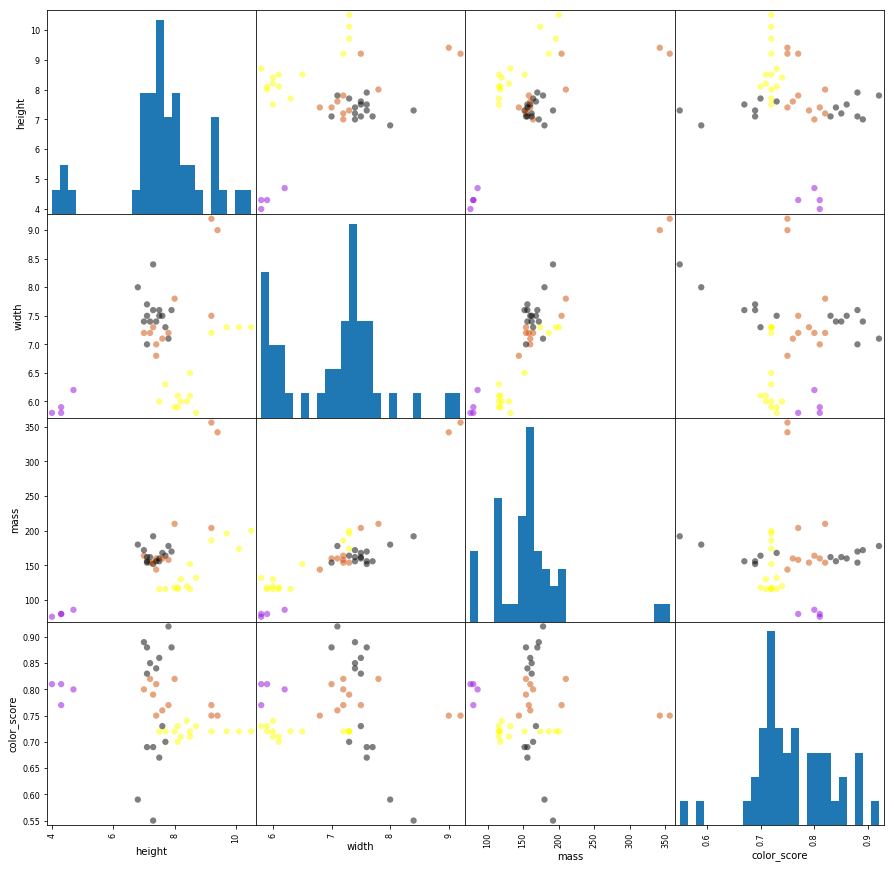

In [6]:
#separate training from testing data
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

#75%:25% train:test split ratio by default, following variable-naming conventions
#provide seed value with random_state parameter for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

from matplotlib import cm
color_map = cm.get_cmap('gnuplot')
#use c= keyword with argument y_train to specify as sequence of values to be color mapped
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':25}, figsize=(15,15), cmap=color_map)

plt.show()

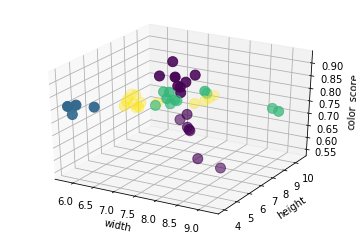

In [7]:
#plot 3d scatter plot 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [8]:
#Classifier

#training and testing data are already split in EDA phase, we are using all features for classification
#make classifier object
knn=KNeighborsClassifier(n_neighbors = 2)
#fit to training data
knn.fit(X_train, y_train)

#use testing data to check accuracy
score = knn.score(X_test, y_test)

print(score*100, "% accurate", sep='')

53.3333333333% accurate


In [14]:
#test novel instances, set observations in same order as columns from earlier
new_fruit = [[9, 6.5, 150, 0.7]] #[[height, width, mass, color_score]]
prediction = knn.predict(new_fruit)
print("new fruit could be an", lookup_fruit_name[prediction[0]]) 

new fruit could be an apple
